## Caso de estudio: transporte de medicamento
### Juan S. Hincapié - Carlos Duque-Daza

### Introducción

<div align='justify'>Reforcemos un poco lo que se ha visto en clase acerca de modelos compartimentales. Empecemos recordando el Teorema de Transporte de Reynolds:</div><br>

$$
\frac{D B_{\text {sys }}}{D t}=\frac{\partial}{\partial t} \int_{\mathrm{cv}} \rho b d \forall+\int_{\mathrm{cs}} \rho b \mathbf{V} \cdot \hat{\mathbf{n}} d A
$$

<div align='justify'>El TTR establece la relación entre la variación de las propiedades de un sistema (también conocida como masa de control) con la variación de las propiedades en un volumen de control. A continuación se presentan valores posibles para $B_{\text {sys }}$ (propiedad extensiva) y para $\mathbf{b}$ (propiedad intensiva).</div><br>

$$
\begin{array}{c|c}
B & b=B / m \\
\hline m & 1 \\
m \mathbf{V} & \mathbf{V} \\
\frac{1}{2} m V^2 & \frac{1}{2} V^2
\end{array}
$$

<div align='justify'>Para conservación de la masa obtenemos la siguiente relación:</div><br>

$$
\frac{D M_{\text {sys }}}{D t}= 0 =\frac{\partial}{\partial t} \int_{\mathrm{cv}} \rho  d \forall+\int_{\mathrm{cs}} \rho  \mathbf{V} \cdot \hat{\mathbf{n}} d A
$$

<div align='justify'>Y se puede expresar de la siguiente manera:</div><br>

$$
\frac{\partial M_{\mathrm{cv}}}{\partial t} + \dot m_{sale} - \dot m_{entra} = 0
$$

<div align='justify'>Si despejamos la cantidad de masa obtenemos:</div><br>

$$
\frac{\partial M_{\mathrm{cv}}}{\partial t} = \dot m_{entra} - \dot m_{sale}
$$

<div align='justify'>Esta ecuación diferencial ordinaria es la que usamos para estudiar la concentración de cierta sustancia en un compartimento en específico en cualquier instante de tiempo. La ecuación que se presentó en clase es:</div><br>

\begin{equation}
    \frac{dx_i}{dt}=(\text{Tasa de entrada})_i-(\text{Tasa de salida})_i
    \tag{1}
\end{equation}

### Caso de estudio: medicamento en el cuerpo

<div align='justify'> Conocer la concentración del medicamento en el cuerpo en cualquier momento después de su ingestión resulta ser una información importante cuando se requiere administrar dosis adecuadas a un paciente. El estudio de la dinámica de un medicamento en el cuerpo se denomina *farmacocinética*. Una forma de modelar estos problemas es mediante <b>compartimentos</b>. Cada uno de estos corresponderá a un organo o sistema involucrado en el proceso. Considerarémos un modelo de dos compartimentos: uno que representa el tracto gastrointestinal y otro que representa el sistema cardiovascular. </div><br>

 <img src=https://raw.githubusercontent.com/juhincapiem/ModMat/main/02Compartimentales/imagenes/Tanques.PNG alt="Alternative text" width="800" />


### Desarrollo del modelo

Para este modelo denotaremos por $\mathbf{x}$ la cantidad de soluto, en $mg$, en nuestro primer compartimento (Tanque A - tracto gastrointestinal) y $\mathbf{y}$ la presente en el segundo compartimento (Tanque B - sistema cardiovascular), también en $mg$. Para este primer caso supongamos que la entrada de $6~L/min$ al Tanque A es agua pura (sin medicamento).

El modelo por compartimentos lo podemos estudiar por medio de la ecuación 1 de balance. En esta $x_i$ se refiere a $x$ o $y$.

<div class="alert alert-block alert-warning">
<b>¿Qué suposiciones realizaremos?</b>
</div>    

1. Dentro de cada tanque supondremos __mezclado perfecto en cada compartimento__, lo que permite obviar consideraciones de procesos de difusión y mezclado dentro de cada sistema estudiado.
1. No existirá **ningun proceso reactivo** que pudiera funcionar como fuente o sumidero del soluto.
1. Cualquier consideración respecto al fluido de trabajo se desprecia, (densidad, viscosidad, volatilidad, tension superficial, etc).
1. Únicamente tomaremos en consideración la cantidad de sustancia presente en cada compartimento para un tiempo $t$.
1. ¿Qué otras consideraciones considera importantes mencionar?. ¿Dimensiona el nivel de simplicidad del modelo planteado?

<div class="alert alert-block alert-warning">
<b>Sistema de ecuaciones</b>
</div>    

El termino a la izquierda de la ecuacion 1 corresponde a la rata de cambio de cada una de las variables en estudio, para nuestro caso corresponde a un flujo másico $\dot{ m_i}$. Este puede ser expresado como:

\begin{equation}
    \dot{ m_i}= \dot{V_{i}} \rho_{i} = \dot{V_{i}} c_{i}
    \tag{2}
\end{equation}

Donde $\dot{V_{i}}$ corresponde a un flujo volumétrico de un compartimento (bien sea de entrada o salida), y $c_{i}$ es la concentración del mismo. ¿Puede observar que esto es dimensionalmente correcto?. Para determinar $c_i$ haremos:

\begin{equation}
    c_{i}=\frac{x_i}{V_i}
    \tag{3}
\end{equation}


Con las anteriores ecuaciones podemos expresar las derivadas temporales de cada variable así:

\begin{align}
    & \frac{dx(t)}{dt}=  \frac{1}{12}y(t) -\frac{1}{3}x(t)=f_x(x,y) \tag{4}\\
    & \frac{dy(t)}{dt}= \text{¿Cuál sería el modelo para el Tanque B?}
\end{align}

Inicialmente el tracto gastrointestinal contiene $20~mg$ ($x(0) = 20~mg$) y el sistema cardiovascular $12~mg$ ($y(0) = 12~mg$)

### Solución numérica

Hasta el momento se conocen dos métodos numéricos.

Con Euler hacia adelante:
\begin{align}
    x_{n+1}=x_n+\Delta t f_x(x_n,y_n) \tag{5}\\
    y_{n+1}=y_n+\Delta t f_y(x_n,y_n) \tag{6}\\
\end{align}

Con Euler hacia atras:
\begin{align}
    x_{n+1}=x_n+\Delta t f_x(x_{n+1},y_{n+1}) \tag{7}\\
    y_{n+1}=y_n+\Delta t f_y(x_{n+1},y_{n+1}) \tag{8}\\
\end{align}

Empecemos con la implementación de Euler hacia adelante ¡Manos a la obra!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Intervalo de tiempo
t0 = 0; tf = 50
#¿Qué paso temporal querés?
dt = 0.8
#Calculamos el número de pasos temporales
N = int((tf-t0)/dt)

#Creamos un vector vacío para almacenar los valores de la concentración
tA = np.zeros(N+1)
tB = np.zeros(N+1)
#Involucramos las condiciones iniciales
tA[0] = 20
tB[0] = 12

#Podemos crear unas funciones para calcular la pendiente
pendienteGastro = lambda x,y: 1/12*y - 1/3*x
def pendienteCardio(x, y):
    return 1/3*x-1/3*y

#Planteamos el ciclo for para resolver la ecuación diferencial
for i in range(0, N, 1):
    tA[i+1] = tA[i] + dt*pendienteGastro(tA[i], tB[i])
    tB[i+1] = tB[i] + dt*pendienteCardio(tA[i], tB[i])


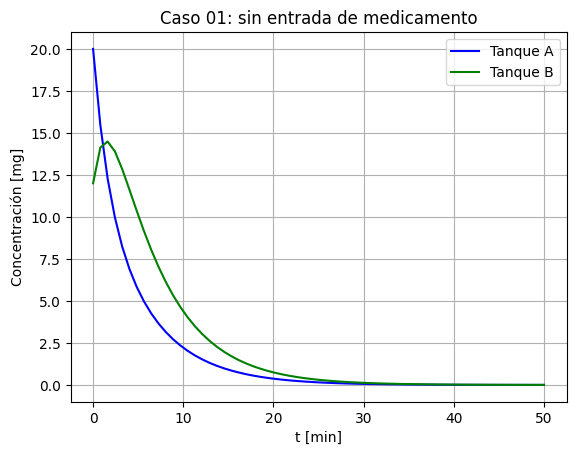

In [3]:
#Para hacer gráficas bien chéveres necesitamos un vector de tiempo
time = np.linspace(t0, tf, N+1)
#Graficamos
plt.plot(time, tA, "b-", label='Tanque A')
plt.plot(time, tB, "g-", label='Tanque B')
plt.title("Caso 01: sin entrada de medicamento")
plt.xlabel("t [min]")
plt.ylabel("Concentración [mg]")
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-block alert-warning">
<b>¿Cree que tiene sentido el estado estacionario del sistema dinámico?</b>
</div>  

### Solución analítica

<div align='justify'>¿Cómo saber si nuestra solución numérica está en lo correcto? Pues tendremos que compararlo con algo que sepamos que está en lo correcto. Podrían ser datos de algún experimento. También podría ser la solución analítica del sistema de ecuaciones, y para este caso es más práctico esta opción. El sistema planteado lo podemos expresar como $\mathbf{x'}=\mathbf{A} \mathbf{x}$: </div><br>

$$
\left[\begin{array}{l}{{x^{\prime}(t)}}\\ {{y^{\prime}(t)}}\end{array}\right]=\left[\begin{array}{l l}{{-{\frac{1}{3}}}}&{{{\frac{1}{2}}}}\\ {{{\frac{1}{3}}}}&{{{\frac{1}{3}}}}\end{array}\right]\left[\begin{array}{l}{{x(t)}}\\ {{y(t)}}\end{array}\right]
$$

Una forma de solucionarlo es encontrar los valores propios del sistema, los vectors propios, y finalmente despejar las constantes. Se sabe que la solución será del tipo:

$$
\mathbf{x} = C_1 \mathbf{u_1} e^{\lambda_1 t} +
             C_2 \mathbf{u_2} e^{\lambda_2 t}
$$

Debemos ahora encontrar los valores propios $\lambda_1$ y $\lambda_2$. Para esto hacemos:

\begin{equation*}
    |\mathbf{A}-\lambda \mathbf{I}| =0
\end{equation*}

Posteriormete, con los valors $\lambda_1$ y $\lambda_2$, se procede a encontrar los vectores propíos asociados a cada valor propio. Para esto se busca la solución a: $(\mathbf{A}- \lambda \mathbf{I})\mathbf{u}$, remplazando en $\lambda$ cada uno de los valores propios $\lambda_1$ y $\lambda_2$

\begin{align}
    & x(t)=\left( \frac{2x_0+y_0}{4}\right)e^{-\frac{t}{2}}+\left(\frac{2x_0-y_0}{4}\right) e^{-\frac{t}{6}} \\
    & y(t)=2\left(\frac{2x_0+y_0}{4}\right)e^{-\frac{t}{2}}-2\left(\frac{2x_0-y_0}{4}\right) e^{-\frac{t}{6}}
\end{align}

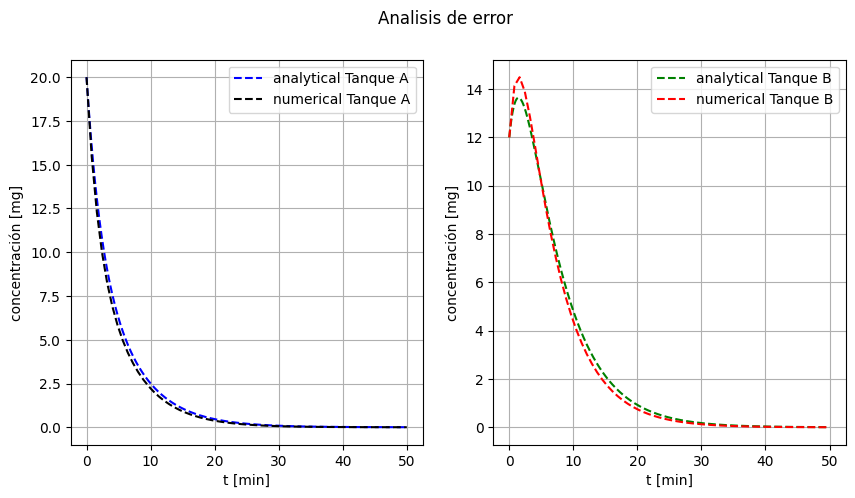

In [5]:
#Creamos dos dfunciones para graficar las soluciones
def solAnalitica(x0, y0, time):
    antA = np.zeros(len(time))
    antB = np.zeros(len(time))
    antA[:] = (2*x0 + y0)/4*np.exp(-time/6) + (2*x0 - y0)/4*np.exp(-time/2)
    antB[:] = 2*(2*x0 + y0)/4*np.exp(-time/6) - 2*(2*x0 - y0)/4*np.exp(-time/2)
    return antA, antB
realTime = np.linspace(t0, tf, 600)
antA, antB = solAnalitica(tA[0], tB[0], realTime)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Analisis de error')

ax1.plot(realTime, antA, "b--", label='analytical Tanque A')
ax1.plot(time, tA, "k--", label='numerical Tanque A')
ax1.set_xlabel("t [min]")
ax1.set_ylabel("concentración [mg]")
ax1.legend()
ax1.grid()

ax2.plot(realTime, antB, "g--", label='analytical Tanque B')
ax2.plot(time, tB, "r--", label='numerical Tanque B')
ax2.set_xlabel("t [min]")
ax2.set_ylabel("concentración [mg]")
ax2.legend()
ax2.grid()

<div class="alert alert-block alert-warning">
<b>¿Qué ocurre si aumentamos el paso temporal? ¿Y si lo volvemos más pequeño?</b>
</div>  

Construir curvas para la evolución de la concentración de medicamento en el tracto gastrointestinal y en el sistema cardiovascular usando el método numérico Forward Euler con dos pasos temporales diferentes:
1. $\Delta t = 0.1$
1. $\Delta t = 1.0$

Y compararlas con la solución analítica. ¿Qué ocurre con el error?

### Variante: con entrada de medicamento

<div align='justify'>Ya tenemos un caso básico de prueba muy bien montado. Con esta base, podemos hacer otras modificaciones al modelo para profundizar en la física. Por ejemplo, podemos definir una entrada de medicamento al tracto gastrointestinal. ¿Cómo se modifican las ecuaciones del sistema? </div><br>

\begin{align}
    & \frac{dx(t)}{dt}=  \frac{1}{12}y(t) + 6c(t) -\frac{1}{3}x(t)= f_x(x,y) \\
    & \frac{dy(t)}{dt}= \frac{1}{3}x(t)-\frac{1}{3}y(t) = f_y(x,y)
\end{align}

Y supongamos que la entrada de medicamento se comporta de acuerdo a la siguiente ecuación:

$$
c(t) = \frac{c_1}{2}[1 + sin(2\pi ft)]
$$

<div class="alert alert-block alert-warning">
<b>¿Qué modificacione tendremos que hacerle a nuestro código original?</b>
</div>  

In [8]:
entradaMed = lambda A, f, t: A/2*(1+np.sin(2*np.pi*f*t))

c = np.zeros(len(realTime))
A = 0.2
f = 0.05
c[:] = entradaMed(A, f, realTime)

#plt.plot(realTime, c)

#Intervalo de tiempo
t0 = 0; tf = 100
#¿Qué paso temporal querés?
dt = 0.1
#Calculamos el número de pasos temporales
N = int((tf-t0)/dt)
#Creamos el vector de tiempo
time = np.linspace(t0, tf, N+1)

#Volvemos a crear la función para la entrada de medicamento
c = np.zeros(len(time))
c[:] = entradaMed(A, f, time)

#Creamos un vector vacío para almacenar los valores de la concentración
tA = np.zeros(N+1)
tB = np.zeros(N+1)
#Involucramos las condiciones iniciales
tA[0] = 20
tB[0] = 12

#Podemos crear unas funciones para calcular la pendiente
pendientetA = lambda x,y,c: 1/12*y + 6*c- 1/3*x
def pednientetB(x, y):
    return 1/3*x-1/3*y

#Planteamos el ciclo for para resolver la ecuación diferencial
for i in range(0, N, 1):
    tA[i+1] = tA[i] + dt*pendientetA(tA[i], tB[i], c[i])
    tB[i+1] = tB[i] + dt*pednientetB(tA[i], tB[i])

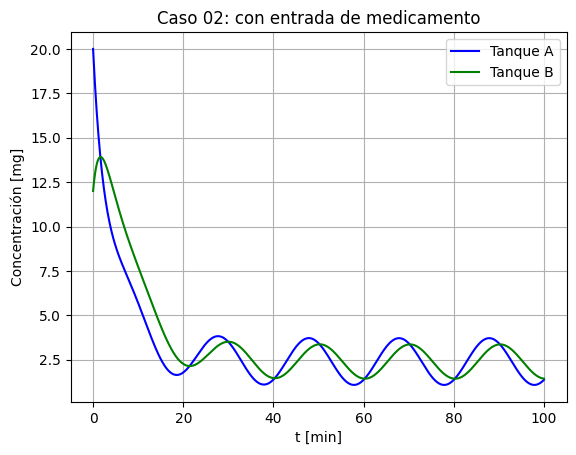

In [9]:
#Graficamos
plt.plot(time, tA, "b-", label='Tanque A')
plt.plot(time, tB, "g-", label='Tanque B')
plt.title("Caso 02: con entrada de medicamento")
plt.xlabel("t [min]")
plt.ylabel("Concentración [mg]")
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-block alert-warning">
<b>¿Qué ocurre con la función $c(t)$ si aumentamos la frecuencia $f$? ¿Qué repercusiones tiene en el sistema dinámico?</b>
</div>  

Probar con diferentes frecuencias:
1. $f=0.01$
1. $f=0.1$
1. $f=1.0$
1. $f=10.0$